## Use to test different parts of the code

Plot doesn't show:
https://stackoverflow.com/questions/36269746/matplotlib-plots-arent-shown-when-running-file-from-bash-terminal

In [2]:
from datetime import date

today = date.today()

# dd/mm/YY
d1 = today.strftime("%d%m%Y")
print("d1 =", d1)

# Textual month, day and year	
d2 = today.strftime("%B %d, %Y")
print("d2 =", d2)

# mm/dd/y
d3 = today.strftime("%m/%d/%y")
print("d3 =", d3)

# Month abbreviation, day and year	
d4 = today.strftime("%b-%d-%Y")
print("d4 =", d4)

d1 = 22022024
d2 = February 22, 2024
d3 = 02/22/24
d4 = Feb-22-2024


C:\Users\Namn\AppData\Local\Temp\ipykernel_8532\1714329735.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[*********************100%%**********************]  1 of 1 completed
C:\Users\Namn\AppData\Local\Temp\ipykernel_8532\1714329735.py:26: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, interval=300000)

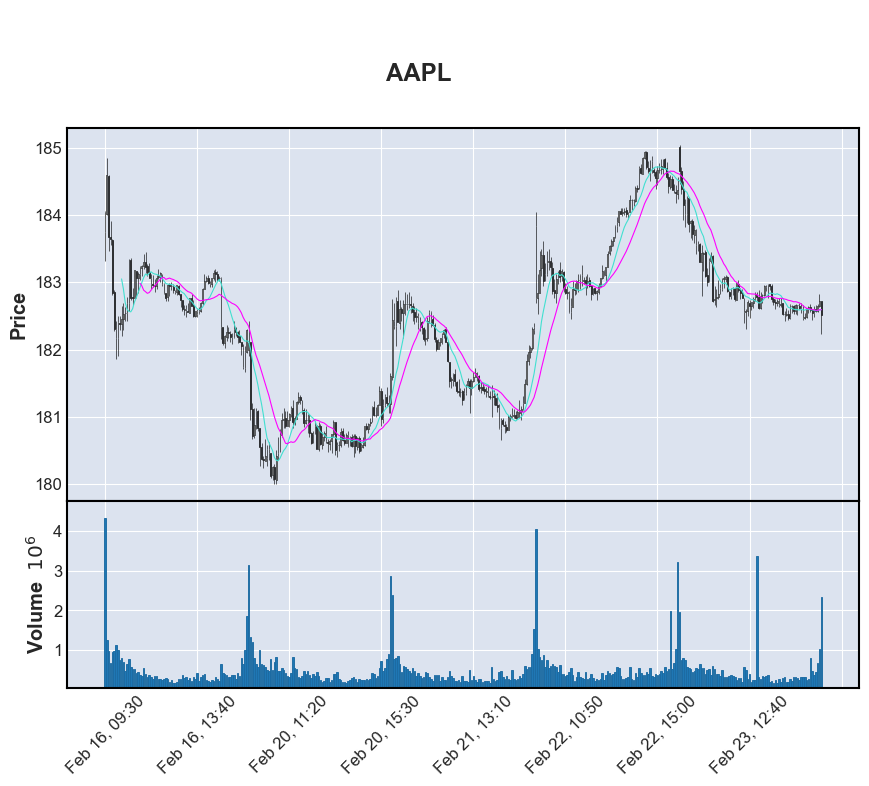

In [1]:
import pandas as pd
import mplfinance as mpf
import matplotlib.animation as animation
import yfinance as yf

def get_data():
    # valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    # valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
    TICKER = "AAPL"
    df = yf.download(tickers=TICKER, period='5d', interval='5m')
    return df

df = get_data() # download the data to produce the original plot
fig, axes = mpf.plot(df,returnfig=True,volume=True,
                     figsize=(11,8),panel_ratios=(2,1),
                     title='\n\nAAPL',type='candle',mav=(10,20))
ax1 = axes[0]
ax2 = axes[2]

def animate(ival):
    data = get_data()    # retrieve latest data
    ax1.clear()          # clear ax1 and ax2 before replotting the latest data
    ax2.clear()
    mpf.plot(data,ax=ax1,volume=ax2, type='candle',mav=(10,20)) # plot the new data

ani = animation.FuncAnimation(fig, animate, interval=300000)  # update plot every 5 minutes = 300000 secs
mpf.show() # display the plot

In [3]:
import mplfinance as mpf
import pandas as pd
import datetime as dt

now = dt.datetime.now()
start = now - dt.timedelta(60)

stock = "AMZN"
filename = stock.lower()+'.png'

df = pd.read_csv(f'./data/prices/24022024_MSFT_1y.csv')
mpf.plot(df,type='candle',style='yahoo',savefig=filename)

TypeError: Expect data.index as DatetimeIndex